       STATION  DATE  LATITUDE  LONGITUDE  ELEVATION                 NAME  \
0  USC00087429  1968  30.54509  -84.59855       72.2  QUINCY 3 SSW, FL US   
1  USC00087429  1969  30.54509  -84.59855       72.2  QUINCY 3 SSW, FL US   
2  USC00087429  1970  30.54509  -84.59855       72.2  QUINCY 3 SSW, FL US   
3  USC00087429  1971  30.54509  -84.59855       72.2  QUINCY 3 SSW, FL US   
4  USC00087429  1972  30.54509  -84.59855       72.2  QUINCY 3 SSW, FL US   

     CDSD  CDSD_ATTRIBUTES    CLDD  CLDD_ATTRIBUTES  ...    PRCP  \
0  1284.3              NaN  1284.3              0.0  ...  1225.7   
1  1180.0              NaN  1180.0              0.0  ...  1797.7   
2  1305.1              NaN  1305.1              0.0  ...  1579.6   
3     NaN              NaN     NaN              NaN  ...     NaN   
4  1342.6              NaN  1342.6              0.0  ...  1277.7   

   PRCP_ATTRIBUTES  SNOW  SNOW_ATTRIBUTES   TAVG  TAVG_ATTRIBUTES   TMAX  \
0               ,0   0.0              T,0  18.53    

/var/folders/m0/zhf_tk496jx_2x2br5lxp5dc0000gn/T/ipykernel_48924/2807981864.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['DATE'] = pd.to_datetime(df_selected['DATE'], format='%Y')


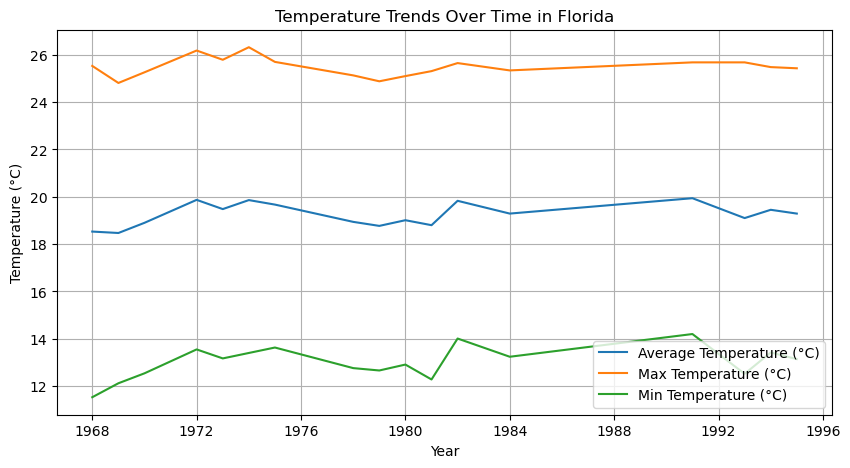

Explanation: Historical temperatures in Florida show stability, with minor fluctuations in average, max, and min temperatures.


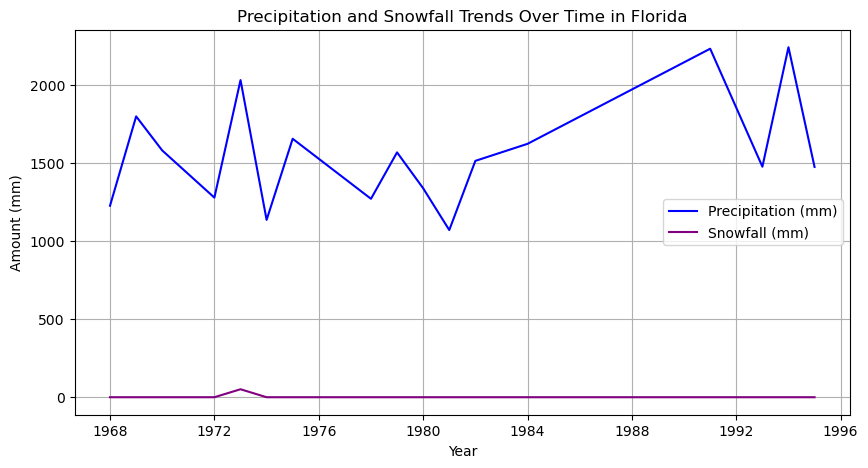

Explanation: Precipitation varies significantly year-to-year, while snowfall is negligible, consistent with Florida's tropical climate.


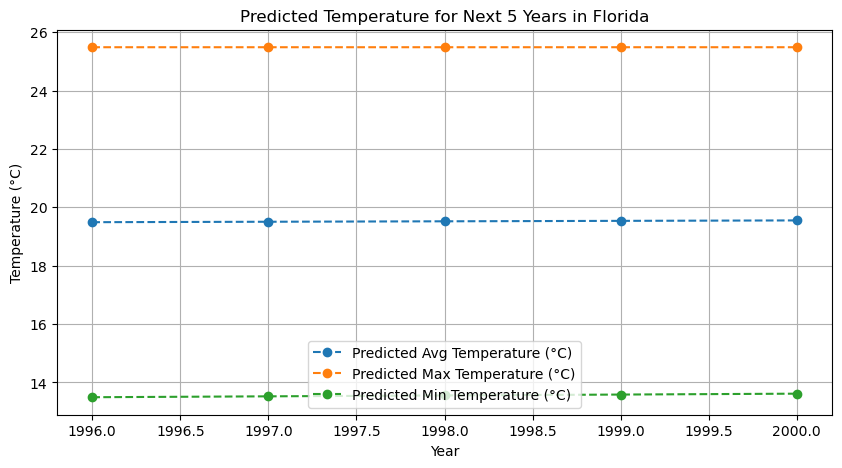

Explanation: Temperatures over the next 5 years are expected to remain stable, with slight variations in max and min temperatures.


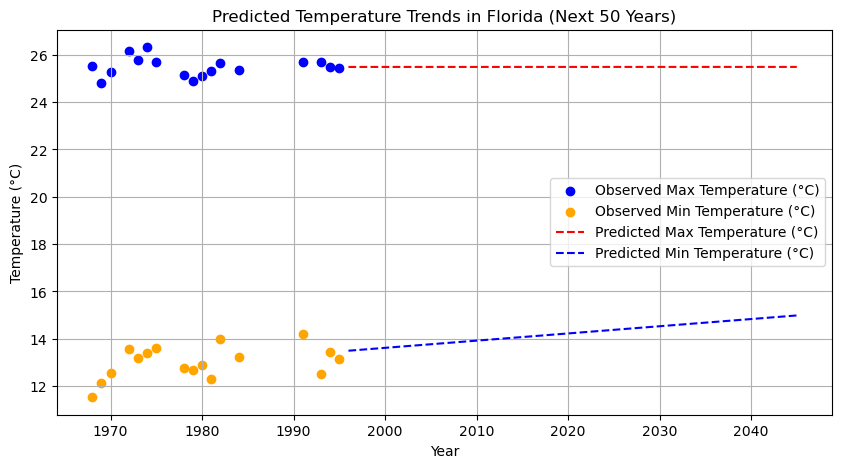

Explanation: Over the next 50 years, maximum temperatures are predicted to stay stable, while minimum temperatures may gradually rise.
Final Answer: Florida will neither freeze nor burn. The climate will remain relatively stable, with slight warming trends in minimum temperatures and consistent maximum temperatures.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/Users/soniakhamitkar/Documents/Freeze or Burn?/data/USC00087429.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(df.head())

# Select relevant columns for analysis
df_selected = df[['DATE', 'TAVG', 'TMAX', 'TMIN', 'PRCP', 'SNOW']]

# Convert 'DATE' column to datetime format
df_selected['DATE'] = pd.to_datetime(df_selected['DATE'], format='%Y')

# Drop rows with missing values in key columns
df_selected = df_selected.dropna(subset=['TAVG', 'TMAX', 'TMIN', 'PRCP', 'SNOW'])

# Compute averages over the years
avg_temps = df_selected[['TAVG', 'TMAX', 'TMIN']].mean()
avg_precip_snow = df_selected[['PRCP', 'SNOW']].mean()

# Display average values
print("Average Temperatures (°C):")
print(avg_temps)
print("\nAverage Precipitation and Snowfall (mm):")
print(avg_precip_snow)

# Set 'DATE' as the index
df_selected.set_index('DATE', inplace=True)

# Plot temperature trends over the years
plt.figure(figsize=(10, 5))
plt.plot(df_selected.index, df_selected['TAVG'], label="Average Temperature (°C)")
plt.plot(df_selected.index, df_selected['TMAX'], label="Max Temperature (°C)")
plt.plot(df_selected.index, df_selected['TMIN'], label="Min Temperature (°C)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trends Over Time in Florida")
plt.legend()
plt.grid(True)
plt.show()

# Add explanation below the graph
print("Explanation: Historical temperatures in Florida show stability, with minor fluctuations in average, max, and min temperatures.")

# Plot precipitation and snowfall trends over the years
plt.figure(figsize=(10, 5))
plt.plot(df_selected.index, df_selected['PRCP'], label="Precipitation (mm)", color='blue')
plt.plot(df_selected.index, df_selected['SNOW'], label="Snowfall (mm)", color='purple')
plt.xlabel("Year")
plt.ylabel("Amount (mm)")
plt.title("Precipitation and Snowfall Trends Over Time in Florida")
plt.legend()
plt.grid(True)
plt.show()

# Add explanation below the graph
print("Explanation: Precipitation varies significantly year-to-year, while snowfall is negligible, consistent with Florida's tropical climate.")

# Predicting next 5 and 50 years based on linear trend
years = df_selected.index.year.values.reshape(-1, 1)
predictions_5 = {}
predictions_50 = {}

future_years_5 = np.array(range(years[-1][0] + 1, years[-1][0] + 6)).reshape(-1, 1)
future_years_50 = np.array(range(years[-1][0] + 1, years[-1][0] + 51)).reshape(-1, 1)

for col in ['TAVG', 'TMAX', 'TMIN', 'PRCP', 'SNOW']:
    model = LinearRegression()
    model.fit(years, df_selected[col].values)
    predictions_5[col] = model.predict(future_years_5)
    predictions_50[col] = model.predict(future_years_50)

# Plot future predictions for temperature (5 years)
plt.figure(figsize=(10, 5))
plt.plot(future_years_5, predictions_5['TAVG'], marker='o', linestyle='dashed', label="Predicted Avg Temperature (°C)")
plt.plot(future_years_5, predictions_5['TMAX'], marker='o', linestyle='dashed', label="Predicted Max Temperature (°C)")
plt.plot(future_years_5, predictions_5['TMIN'], marker='o', linestyle='dashed', label="Predicted Min Temperature (°C)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Predicted Temperature for Next 5 Years in Florida")
plt.legend()
plt.grid(True)
plt.show()

# Add explanation below the graph
print("Explanation: Temperatures over the next 5 years are expected to remain stable, with slight variations in max and min temperatures.")

# Plot observed and predicted temperature trends for the next 50 years
plt.figure(figsize=(10, 5))

# Plot observed data
plt.scatter(df_selected.index.year, df_selected['TMAX'], label="Observed Max Temperature (°C)", color='blue')
plt.scatter(df_selected.index.year, df_selected['TMIN'], label="Observed Min Temperature (°C)", color='orange')

# Plot predicted trends
plt.plot(future_years_50, predictions_50['TMAX'], linestyle='dashed', label="Predicted Max Temperature (°C)", color='red')
plt.plot(future_years_50, predictions_50['TMIN'], linestyle='dashed', label="Predicted Min Temperature (°C)", color='blue')

# Add labels, title, and legend
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Predicted Temperature Trends in Florida (Next 50 Years)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Add explanation below the graph
print("Explanation: Over the next 50 years, maximum temperatures are predicted to stay stable, while minimum temperatures may gradually rise.")

# Final answer
print("Final Answer: Florida will neither freeze nor burn. The climate will remain relatively stable, with slight warming trends in minimum temperatures and consistent maximum temperatures.")
